# Copyright 2020 Google LLC.
 Licensed under the Apache License, Version 2.0 (the "License");
 you may not use this file except in compliance with the License.
 You may obtain a copy of the License at

 https://www.apache.org/licenses/LICENSE-2.0

 Unless required by applicable law or agreed to in writing, software
 distributed under the License is distributed on an "AS IS" BASIS,
 WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
 See the License for the specific language governing permissions and
| limitations under the License.

In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
    """Create and compile a simple linear regression model"""
    # Most simple tf.keras models are sequential. 
    # A sequential model contains one or more layers.
    model = tf.keras.models.Sequential()

    # Describe the topography of the model.
    # The topography of a simple linear regression model
    # is a single node in a single layer. 
    model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

    # Compile the model topography into code that 
    # TensorFlow can efficiently execute. Configure 
    # training to minimize the model's mean squared error. 
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model           


def train_model(model, feature, label, epochs, batch_size):
    """Train the model by feeding it data."""

    # Feed the feature values and the label values to the 
    # model. The model will train for the specified number 
    # of epochs, gradually learning how the feature values
    # relate to the label values. 
    history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

    # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the 
    # rest of history.
    epochs = history.epoch

    # Gather the history (a snapshot) of each epoch.
    hist = pd.DataFrame(history.history)

    # Specifically gather the model's root mean 
    #squared error at each epoch. 
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [3]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the training feature and label."""

    # Label the axes.
    plt.xlabel("feature")
    plt.ylabel("label")

    # Plot the feature values vs. label values.
    plt.scatter(feature, label)

    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    x0 = 0
    y0 = trained_bias
    x1 = feature[-1]
    y1 = trained_bias + (trained_weight * x1)

    plt.plot([x0, x1], [y0, y1], c='r')

    # Render the scatter plot and the red line.
    plt.show()

def plot_the_loss_curve(epochs, rmse):
    """Plot the loss curve, which shows loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [4]:
# sample data set
#the dataset consists of 12 examples. Each example consists of one feature and one label.
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

#Specify the hyperparameters

Epoch 1/450
1/1 [==============================] - 0s 149ms/step - loss: 221.5337 - root_mean_squared_error: 14.8840
Epoch 2/450
1/1 [==============================] - 0s 1ms/step - loss: 213.8457 - root_mean_squared_error: 14.6235
Epoch 3/450
1/1 [==============================] - 0s 1ms/step - loss: 208.3997 - root_mean_squared_error: 14.4361
Epoch 4/450
1/1 [==============================] - 0s 2ms/step - loss: 203.9169 - root_mean_squared_error: 14.2799
Epoch 5/450
1/1 [==============================] - 0s 3ms/step - loss: 199.9938 - root_mean_squared_error: 14.1419
Epoch 6/450
1/1 [==============================] - 0s 3ms/step - loss: 196.4437 - root_mean_squared_error: 14.0158
Epoch 7/450
1/1 [==============================] - 0s 1ms/step - loss: 193.1629 - root_mean_squared_error: 13.8983
Epoch 8/450
1/1 [==============================] - 0s 2ms/step - loss: 190.0869 - root_mean_squared_error: 13.7872
Epoch 9/450
1/1 [==============================] - 0s 2ms/step - loss: 187.172

Epoch 72/450
1/1 [==============================] - 0s 2ms/step - loss: 74.2229 - root_mean_squared_error: 8.6153
Epoch 73/450
1/1 [==============================] - 0s 8ms/step - loss: 72.9237 - root_mean_squared_error: 8.5395
Epoch 74/450
1/1 [==============================] - 0s 2ms/step - loss: 71.6371 - root_mean_squared_error: 8.4639
Epoch 75/450
1/1 [==============================] - 0s 2ms/step - loss: 70.3629 - root_mean_squared_error: 8.3883
Epoch 76/450
1/1 [==============================] - 0s 2ms/step - loss: 69.1013 - root_mean_squared_error: 8.3127
Epoch 77/450
1/1 [==============================] - 0s 2ms/step - loss: 67.8521 - root_mean_squared_error: 8.2372
Epoch 78/450
1/1 [==============================] - 0s 2ms/step - loss: 66.6154 - root_mean_squared_error: 8.1618
Epoch 79/450
1/1 [==============================] - 0s 2ms/step - loss: 65.3911 - root_mean_squared_error: 8.0865
Epoch 80/450
1/1 [==============================] - 0s 2ms/step - loss: 64.1793 - root_m

1/1 [==============================] - 0s 2ms/step - loss: 0.9031 - root_mean_squared_error: 0.9503
Epoch 215/450
1/1 [==============================] - 0s 2ms/step - loss: 0.9026 - root_mean_squared_error: 0.9500
Epoch 216/450
1/1 [==============================] - 0s 2ms/step - loss: 0.9022 - root_mean_squared_error: 0.9498
Epoch 217/450
1/1 [==============================] - 0s 1ms/step - loss: 0.9018 - root_mean_squared_error: 0.9496
Epoch 218/450
1/1 [==============================] - 0s 1ms/step - loss: 0.9014 - root_mean_squared_error: 0.9494
Epoch 219/450
1/1 [==============================] - 0s 2ms/step - loss: 0.9011 - root_mean_squared_error: 0.9492
Epoch 220/450
1/1 [==============================] - 0s 2ms/step - loss: 0.9007 - root_mean_squared_error: 0.9490
Epoch 221/450
1/1 [==============================] - 0s 2ms/step - loss: 0.9003 - root_mean_squared_error: 0.9489
Epoch 222/450
1/1 [==============================] - 0s 2ms/step - loss: 0.8999 - root_mean_squared_er

Epoch 286/450
1/1 [==============================] - 0s 2ms/step - loss: 0.8757 - root_mean_squared_error: 0.9358
Epoch 287/450
1/1 [==============================] - 0s 2ms/step - loss: 0.8758 - root_mean_squared_error: 0.9358
Epoch 288/450
1/1 [==============================] - 0s 2ms/step - loss: 0.8761 - root_mean_squared_error: 0.9360
Epoch 289/450
1/1 [==============================] - 0s 1ms/step - loss: 0.8770 - root_mean_squared_error: 0.9365
Epoch 290/450
1/1 [==============================] - 0s 2ms/step - loss: 0.8789 - root_mean_squared_error: 0.9375
Epoch 291/450
1/1 [==============================] - 0s 2ms/step - loss: 0.8810 - root_mean_squared_error: 0.9386
Epoch 292/450
1/1 [==============================] - 0s 2ms/step - loss: 0.8807 - root_mean_squared_error: 0.9385
Epoch 293/450
1/1 [==============================] - 0s 2ms/step - loss: 0.8787 - root_mean_squared_error: 0.9374
Epoch 294/450
1/1 [==============================] - 0s 3ms/step - loss: 0.8772 - root_m

Epoch 429/450
1/1 [==============================] - 0s 1ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 430/450
1/1 [==============================] - 0s 2ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 431/450
1/1 [==============================] - 0s 2ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 432/450
1/1 [==============================] - 0s 8ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 433/450
1/1 [==============================] - 0s 2ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 434/450
1/1 [==============================] - 0s 2ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 435/450
1/1 [==============================] - 0s 2ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 436/450
1/1 [==============================] - 0s 2ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 437/450
1/1 [==============================] - 0s 2ms/step - loss: 0.8768 - root_m

/home/sang/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


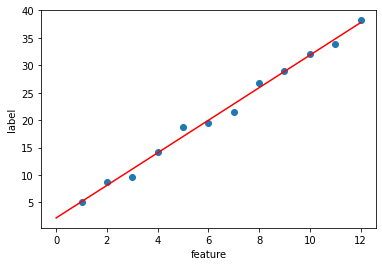

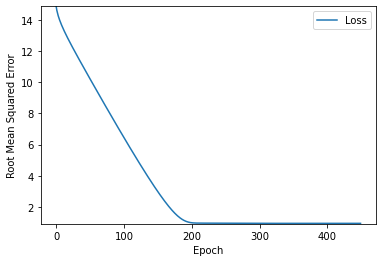

In [5]:
learning_rate=0.01
epochs=450
my_batch_size=12 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [6]:
# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [7]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [8]:
# Get statistics on the dataset.
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


The maximum value (max) of several columns seems very
high compared to the other quantiles. For example,
example the total_rooms column. Given the quantile
values (25%, 50%, and 75%), you might expect the 
max value of total_rooms to be approximately 
5,000 or possibly 10,000. However, the max value 
is actually 37,937.

When you see anomalies in a column, become more careful
about using that column as a feature. That said,
anomalies in potential features sometimes mirror 
anomalies in the label, which could make the column 
be (or seem to be) a powerful feature.
Also, as you will see later in the course, you 
might be able to represent (pre-process) raw data 
in order to make columns into useful features.

An important part of machine learning is determining which features correlate with the label. For example, real-life home-value prediction models typically rely on hundreds of features and synthetic features. However, this model relies on only one feature.

You can use the trained model to make predictions. In practice, you should make predictions on examples that are not used in training. However, for this exercise, you'll just work with a subset of the same training dataset. 

In [16]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
    """Create and compile a simple linear regression model."""
    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    # Describe the topography of the model.
    # The topography of a simple linear regression model
    # is a single node in a single layer.
    model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

    # Compile the model topography into code that TensorFlow can efficiently
    # execute. Configure training to minimize the model's mean squared error. 
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model        


def train_model(model, df, feature, label, epochs, batch_size):
    """Train the model by feeding it data."""

    # Feed the model the feature and the label.
    # The model will train for the specified number of epochs. 
    history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

    # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the error for each epoch.
    hist = pd.DataFrame(history.history)

    # To track the progression of training, we're going to take a snapshot
    # of the model's root mean squared error at each epoch. 
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [17]:
def predict_house_values(n, feature, label):
    """Predict house values based on a feature."""

    batch = training_df[feature][10000:10000 + n]
    predicted_values = my_model.predict_on_batch(x=batch)

    print("feature   label          predicted")
    print("  value   value          value")
    print("          in thousand$   in thousand$")
    print("--------------------------------------")
    for i in range(n):
        print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                       training_df[label][10000 + i],
                                       predicted_values[i][0] ))

1. Create a synthetic feature that's a ratio of total_rooms to population.
2. Tune the three hyperparameters.
3. Determine whether this synthetic feature produces a lower loss value than any of the single features

Epoch 1/24
  1/567 [..............................] - ETA: 1:25 - loss: 57160.0352 - root_mean_squared_error: 239.0816

/home/sang/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


567/567 [==============================] - 0s 349us/step - loss: 38283.8281 - root_mean_squared_error: 195.6625
Epoch 2/24
567/567 [==============================] - 0s 334us/step - loss: 19036.0820 - root_mean_squared_error: 137.9713
Epoch 3/24
567/567 [==============================] - 0s 338us/step - loss: 15110.5049 - root_mean_squared_error: 122.9248
Epoch 4/24
567/567 [==============================] - 0s 343us/step - loss: 14860.6221 - root_mean_squared_error: 121.9042
Epoch 5/24
567/567 [==============================] - 0s 338us/step - loss: 14647.0332 - root_mean_squared_error: 121.0249
Epoch 6/24
567/567 [==============================] - 0s 340us/step - loss: 14471.7646 - root_mean_squared_error: 120.2986
Epoch 7/24
567/567 [==============================] - 0s 336us/step - loss: 14281.3896 - root_mean_squared_error: 119.5048
Epoch 8/24
567/567 [==============================] - 0s 335us/step - loss: 14139.8447 - root_mean_squared_error: 118.9111
Epoch 9/24
567/567 [=======

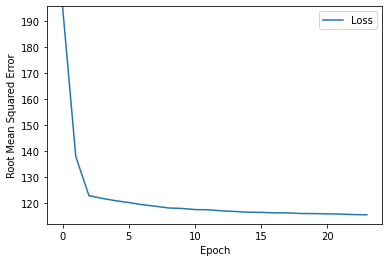

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             188
    2     92             200
    2     69             194
    2     62             210
    1     80             185
    2    295             224
    2    500             209
    2    342             222
    4    118             286
    2    128             213
    2    187             223
    3     80             233
    2    112             224
    2     95             218
    2     69             209


In [15]:

# Tune the hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Specify the feature and the label.
# Define a synthetic feature
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
my_feature = "rooms_per_person"
my_label="median_house_value" # the median value of a house on a specific city block.

# Discard any pre-existing version of the model.
my_model = None

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)

A correlation matrix indicates how each attribute's raw values relate to the other attributes' raw values. Correlation values have the following meanings:

1. 1.0: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
2. -1.0: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
3. 0.0: no correlation; the two columns are not linearly related.

In general, the higher the absolute value of a correlation value, the greater its predictive power. For example, a correlation value of -0.8 implies far more predictive power than a correlation of -0.2.

The following code cell generates the correlation matrix for attributes of the California Housing Dataset:

In [19]:
# Generate a correlation matrix.
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


The `median_income` correlates 0.7 with the label 
(median_house_value), so median_income might be a 
good feature. The other seven potential features
all have a correlation relatively close to 0. 

If time permits, try median_income as the feature
and see whether the model improves.

Epoch 1/30
567/567 [==============================] - 0s 326us/step - loss: 19269.8398 - root_mean_squared_error: 138.8158
Epoch 2/30
567/567 [==============================] - 0s 346us/step - loss: 7014.6655 - root_mean_squared_error: 83.7536
Epoch 3/30
567/567 [==============================] - 0s 335us/step - loss: 7018.2275 - root_mean_squared_error: 83.7749
Epoch 4/30
567/567 [==============================] - 0s 341us/step - loss: 7017.2075 - root_mean_squared_error: 83.7688
Epoch 5/30
567/567 [==============================] - 0s 325us/step - loss: 7017.4858 - root_mean_squared_error: 83.7704
Epoch 6/30
567/567 [==============================] - 0s 438us/step - loss: 7015.9312 - root_mean_squared_error: 83.7612
Epoch 7/30
567/567 [==============================] - 0s 353us/step - loss: 7017.5264 - root_mean_squared_error: 83.7707
Epoch 8/30
567/567 [==============================] - 0s 340us/step - loss: 7018.3774 - root_mean_squared_error: 83.7758
Epoch 9/30
567/567 [==========

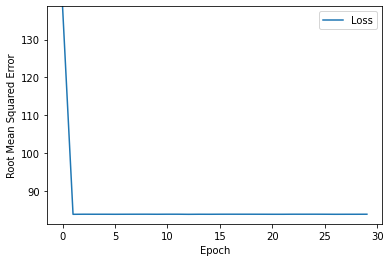

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             134
    4     92             211
    3     69             154
    2     62             132
    3     80             153
    2    295             147
   10    500             456
    5    342             259
    2    118             146
    4    128             221
    8    187             396
    3     80             162
    3    112             179
    4     95             221
    2     69             143


In [21]:
# Tune the hyperparameters.
learning_rate = 0.1
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "median_income"
my_label="median_house_value" 

# Discard any pre-existing version of the model.
my_model = None

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)